In [11]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Dense, Dropout, LeakyReLU
from tensorflow.keras.optimizers import Adam


In [12]:
data = pd.read_csv('pems.csv')

In [13]:
X = data[['from', 'to', 'cost']]

# Standardize the data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Split the data into training and testing sets
X_train, X_test = train_test_split(X_scaled, test_size=0.2, random_state=42)

# Step 2: Build the Autoencoder Model
input_dim = X_train.shape[1]
encoding_dim = 2  # Number of neurons in the bottleneck layer


In [14]:
input_layer = Input(shape=(input_dim,))

# Encoder layers
encoded = Dense(128)(input_layer)
encoded = LeakyReLU(alpha=0.2)(encoded)
encoded = Dropout(0.2)(encoded)
encoded = Dense(64)(encoded)
encoded = LeakyReLU(alpha=0.2)(encoded)
encoded = Dropout(0.2)(encoded)
encoded = Dense(encoding_dim, activation='relu')(encoded)

# Decoder layers
decoded = Dense(64)(encoded)
decoded = LeakyReLU(alpha=0.2)(decoded)
decoded = Dropout(0.2)(decoded)
decoded = Dense(128)(decoded)
decoded = LeakyReLU(alpha=0.2)(decoded)
decoded = Dropout(0.2)(decoded)
decoded = Dense(input_dim, activation='sigmoid')(decoded)

# Autoencoder model
autoencoder = Model(input_layer, decoded)

# Compile the model
autoencoder.compile(optimizer=Adam(learning_rate=0.001), loss='mean_squared_error')

# Train the model
history = autoencoder.fit(X_train, X_train, 
                          epochs=100, 
                          batch_size=32, 
                          validation_data=(X_test, X_test),
                          verbose=1)


Epoch 1/100
38/38 [==============================] - 1s 3ms/step - loss: 0.9822 - val_loss: 0.9506
Epoch 2/100
38/38 [==============================] - 0s 1ms/step - loss: 0.6424 - val_loss: 0.7814
Epoch 3/100
38/38 [==============================] - 0s 1ms/step - loss: 0.5659 - val_loss: 0.7423
Epoch 4/100
38/38 [==============================] - 0s 1ms/step - loss: 0.5385 - val_loss: 0.7231
Epoch 5/100
38/38 [==============================] - 0s 1ms/step - loss: 0.5233 - val_loss: 0.7054
Epoch 6/100
38/38 [==============================] - 0s 1ms/step - loss: 0.5091 - val_loss: 0.6977
Epoch 7/100
38/38 [==============================] - 0s 1ms/step - loss: 0.5017 - val_loss: 0.6947
Epoch 8/100
38/38 [==============================] - 0s 1ms/step - loss: 0.4898 - val_loss: 0.6870
Epoch 9/100
38/38 [==============================] - 0s 1ms/step - loss: 0.4881 - val_loss: 0.6872
Epoch 10/100
38/38 [==============================] - 0s 1ms/step - loss: 0.4835 - val_loss: 0.6835
Epoch 11/

10/10 [==============================] - 0s 430us/step


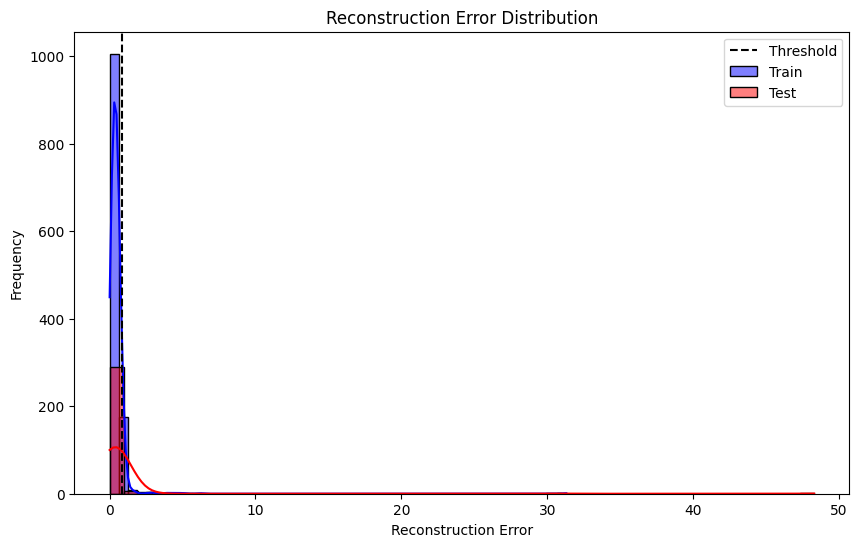

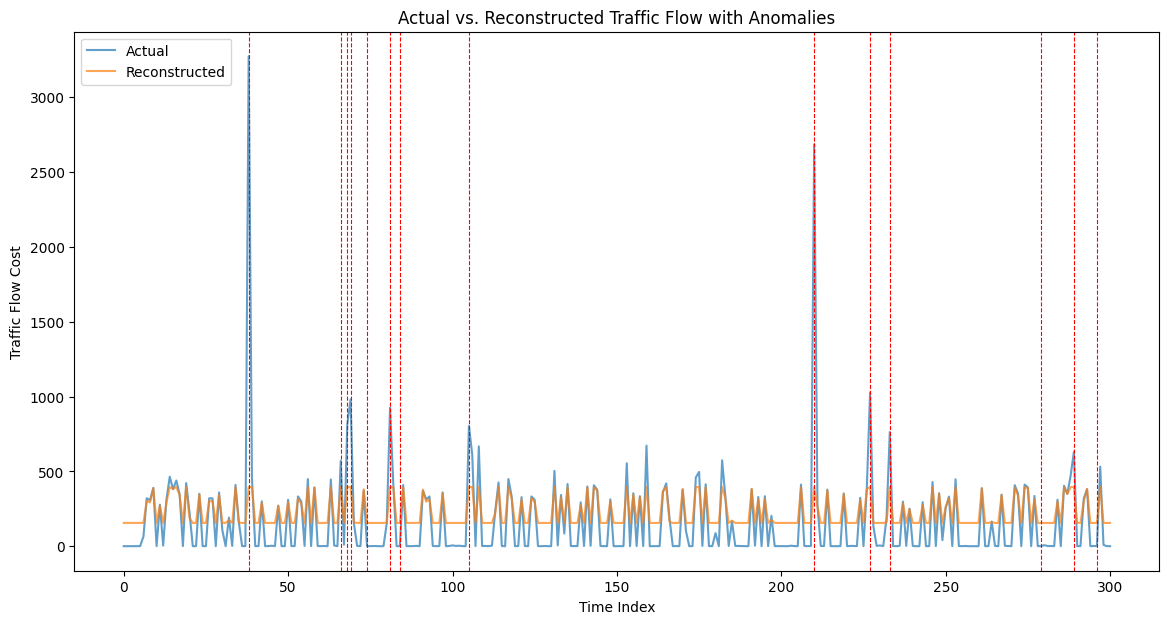

In [15]:
X_train_pred = autoencoder.predict(X_train)
X_test_pred = autoencoder.predict(X_test)

# Calculate the reconstruction error
reconstruction_error_train = np.mean(np.power(X_train - X_train_pred, 2), axis=1)
reconstruction_error_test = np.mean(np.power(X_test - X_test_pred, 2), axis=1)

# Define the anomaly threshold
threshold = np.percentile(reconstruction_error_train, 95)

# Identify anomalies
anomalies_train = reconstruction_error_train > threshold
anomalies_test = reconstruction_error_test > threshold

# Visualization: Reconstruction Error Distribution
plt.figure(figsize=(10, 6))
sns.histplot(reconstruction_error_train, bins=50, kde=True, color='blue', label='Train')
sns.histplot(reconstruction_error_test, bins=50, kde=True, color='red', label='Test')
plt.axvline(x=threshold, color='black', linestyle='--', label='Threshold')
plt.xlabel('Reconstruction Error')
plt.ylabel('Frequency')
plt.title('Reconstruction Error Distribution')
plt.legend()
plt.show()

# Visualization: Actual vs. Predicted with Anomalies
time_index = range(len(X_test))

plt.figure(figsize=(14, 7))
plt.plot(time_index, scaler.inverse_transform(X_test)[:, 2], label='Actual', alpha=0.7)
plt.plot(time_index, scaler.inverse_transform(X_test_pred)[:, 2], label='Reconstructed', alpha=0.7)

# Mark anomalies with red lines
for i, is_anomaly in enumerate(anomalies_test):
    if is_anomaly:
        plt.axvline(x=i, color='red', linestyle='--', linewidth=0.8)

plt.xlabel('Time Index')
plt.ylabel('Traffic Flow Cost')
plt.title('Actual vs. Reconstructed Traffic Flow with Anomalies')
plt.legend()

Epoch 1/50
38/38 [==============================] - 0s 2ms/step - loss: 1.1702 - val_loss: 1.3167
Epoch 2/50
38/38 [==============================] - 0s 1ms/step - loss: 0.9804 - val_loss: 1.0486
Epoch 3/50
38/38 [==============================] - 0s 947us/step - loss: 0.7540 - val_loss: 0.8790
Epoch 4/50
38/38 [==============================] - 0s 934us/step - loss: 0.6468 - val_loss: 0.8160
Epoch 5/50
38/38 [==============================] - 0s 936us/step - loss: 0.6008 - val_loss: 0.7874
Epoch 6/50
38/38 [==============================] - 0s 944us/step - loss: 0.5813 - val_loss: 0.7729
Epoch 7/50
38/38 [==============================] - 0s 931us/step - loss: 0.5699 - val_loss: 0.7628
Epoch 8/50
38/38 [==============================] - 0s 893us/step - loss: 0.5575 - val_loss: 0.7538
Epoch 9/50
38/38 [==============================] - 0s 891us/step - loss: 0.5465 - val_loss: 0.7347
Epoch 10/50
38/38 [==============================] - 0s 898us/step - loss: 0.5136 - val_loss: 0.6899
Epo

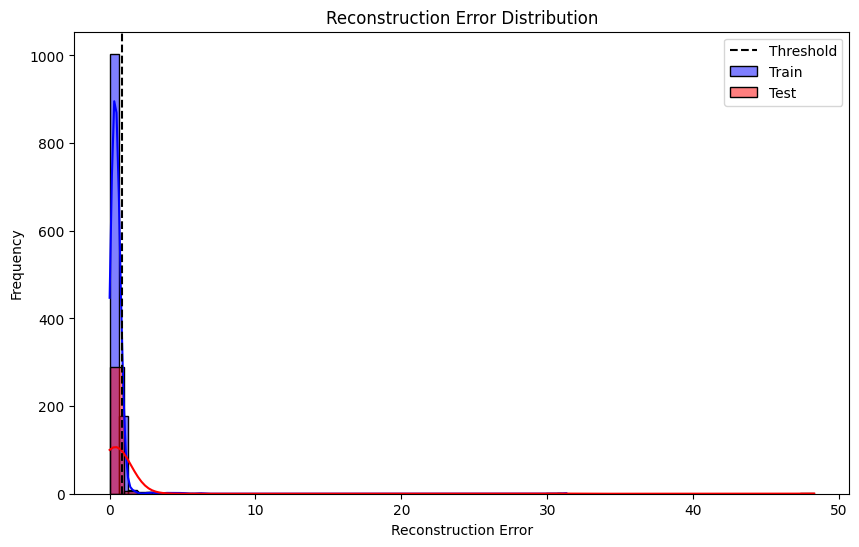

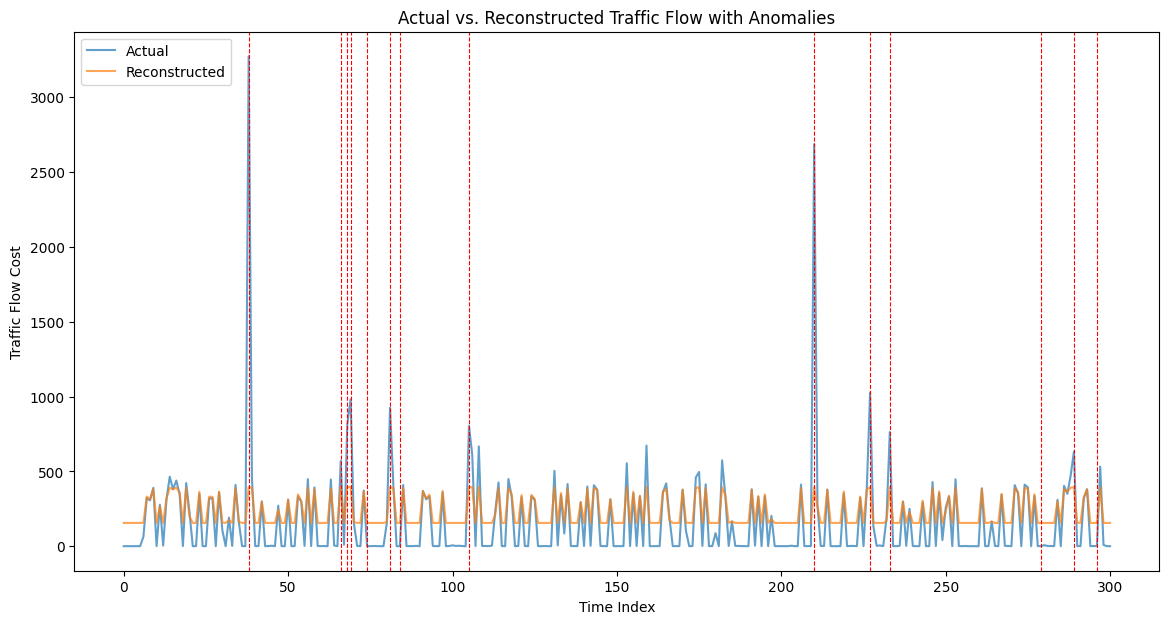

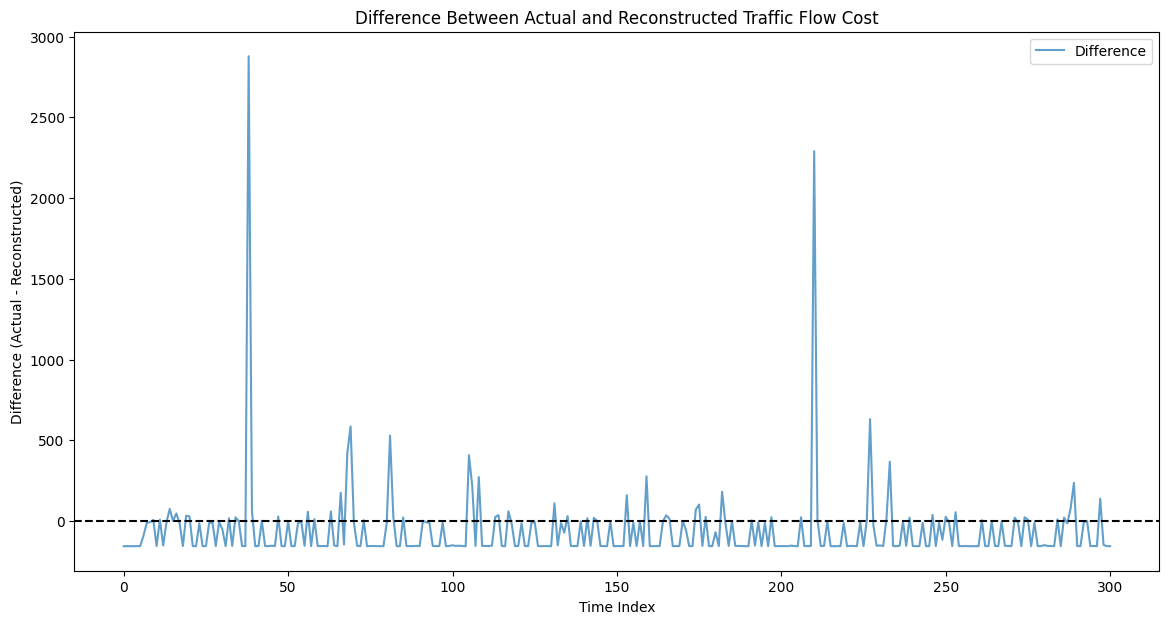

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Dense, Dropout, ReLU
from tensorflow.keras.optimizers import Adam

# Load the data
data = pd.read_csv('pems.csv')

# Splitting data into features and target
X = data[['from', 'to', 'cost']]

# Standardize the data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Split the data into training and testing sets
X_train, X_test = train_test_split(X_scaled, test_size=0.2, random_state=42)

# Build the Refined Autoencoder Model
input_dim = X_train.shape[1]
encoding_dim = 3  # Bottleneck layer size

# Input layer
input_layer = Input(shape=(input_dim,))

# Encoder layers
encoded = Dense(64, activation='relu')(input_layer)
encoded = Dropout(0.1)(encoded)
encoded = Dense(encoding_dim, activation='relu')(encoded)

# Decoder layers
decoded = Dense(64, activation='relu')(encoded)
decoded = Dropout(0.1)(decoded)
decoded = Dense(input_dim, activation='sigmoid')(decoded)

# Autoencoder model
autoencoder = Model(input_layer, decoded)

# Compile the model
autoencoder.compile(optimizer=Adam(learning_rate=0.001), loss='mean_squared_error')

# Train the model
history = autoencoder.fit(X_train, X_train, 
                          epochs=50, 
                          batch_size=32, 
                          validation_data=(X_test, X_test),
                          verbose=1)

# Detect Anomalies
# Predict the reconstruction
X_train_pred = autoencoder.predict(X_train)
X_test_pred = autoencoder.predict(X_test)

# Calculate the reconstruction error
reconstruction_error_train = np.mean(np.power(X_train - X_train_pred, 2), axis=1)
reconstruction_error_test = np.mean(np.power(X_test - X_test_pred, 2), axis=1)

# Define the anomaly threshold
threshold = np.percentile(reconstruction_error_train, 95)

# Identify anomalies
anomalies_train = reconstruction_error_train > threshold
anomalies_test = reconstruction_error_test > threshold

# Visualization: Reconstruction Error Distribution
plt.figure(figsize=(10, 6))
sns.histplot(reconstruction_error_train, bins=50, kde=True, color='blue', label='Train')
sns.histplot(reconstruction_error_test, bins=50, kde=True, color='red', label='Test')
plt.axvline(x=threshold, color='black', linestyle='--', label='Threshold')
plt.xlabel('Reconstruction Error')
plt.ylabel('Frequency')
plt.title('Reconstruction Error Distribution')
plt.legend()
plt.show()

# Visualization: Actual vs. Predicted with Anomalies
time_index = range(len(X_test))

# Plot actual vs reconstructed for cost
plt.figure(figsize=(14, 7))
plt.plot(time_index, scaler.inverse_transform(X_test)[:, 2], label='Actual', alpha=0.7)
plt.plot(time_index, scaler.inverse_transform(X_test_pred)[:, 2], label='Reconstructed', alpha=0.7)

# Mark anomalies with red lines
for i, is_anomaly in enumerate(anomalies_test):
    if is_anomaly:
        plt.axvline(x=i, color='red', linestyle='--', linewidth=0.8)

plt.xlabel('Time Index')
plt.ylabel('Traffic Flow Cost')
plt.title('Actual vs. Reconstructed Traffic Flow with Anomalies')
plt.legend()
plt.show()

# Check for bias in reconstructed values
plt.figure(figsize=(14, 7))
plt.plot(time_index, scaler.inverse_transform(X_test)[:, 2] - scaler.inverse_transform(X_test_pred)[:, 2], label='Difference', alpha=0.7)
plt.axhline(y=0, color='black', linestyle='--')
plt.xlabel('Time Index')
plt.ylabel('Difference (Actual - Reconstructed)')
plt.title('Difference Between Actual and Reconstructed Traffic Flow Cost')
plt.legend()
plt.show()


In [9]:
import numpy as np
import pandas as pd
import tensorflow as tf
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Dense
from sklearn.preprocessing import MinMaxScaler

# Load the dataset
data = pd.read_csv('./pems.csv')
# Normalize the data
scaler = MinMaxScaler()
data_scaled = scaler.fit_transform(data[['from', 'to', 'cost']])

# Split into input and target
X = data_scaled[:, :2]  # 'from' and 'to' as input
y = data_scaled[:, 2]   # cost as target

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


input_layer = Input(shape=(2,))
encoded = Dense(128, activation='relu')(input_layer)
encoded = Dropout(0.2)(encoded)  # Adding dropout for regularization
encoded = Dense(64, activation='relu')(encoded)

decoded = Dense(128, activation='relu')(encoded)
decoded = Dropout(0.2)(decoded)  # Adding dropout for regularization
decoded = Dense(1, activation='linear')(decoded)

autoencoder = Model(inputs=input_layer, outputs=decoded)
autoencoder.compile(optimizer=Adam(learning_rate=0.001), loss='mse')

# Train the autoencoder
history = autoencoder.fit(X_train, y_train, epochs=100, batch_size=8, validation_split=0.2)

# Make predictions
predictions = autoencoder.predict(X_test)

# Inverse transform the predictions
X_test_with_predictions = np.concatenate((X_test, predictions), axis=1)
X_test_with_predictions = scaler.inverse_transform(X_test_with_predictions)
predictions_inverse = X_test_with_predictions[:, -1]
y_test_inverse = scaler.inverse_transform(np.concatenate((X_test, y_test.reshape(-1, 1)), axis=1))[:, -1]


Epoch 1/100
120/120 [==============================] - 0s 1ms/step - loss: 0.0033 - val_loss: 0.0032
Epoch 2/100
120/120 [==============================] - 0s 652us/step - loss: 0.0028 - val_loss: 0.0030
Epoch 3/100
120/120 [==============================] - 0s 641us/step - loss: 0.0026 - val_loss: 0.0030
Epoch 4/100
120/120 [==============================] - 0s 675us/step - loss: 0.0025 - val_loss: 0.0029
Epoch 5/100
120/120 [==============================] - 0s 680us/step - loss: 0.0025 - val_loss: 0.0028
Epoch 6/100
120/120 [==============================] - 0s 628us/step - loss: 0.0025 - val_loss: 0.0029
Epoch 7/100
120/120 [==============================] - 0s 631us/step - loss: 0.0024 - val_loss: 0.0028
Epoch 8/100
120/120 [==============================] - 0s 605us/step - loss: 0.0024 - val_loss: 0.0029
Epoch 9/100
120/120 [==============================] - 0s 622us/step - loss: 0.0024 - val_loss: 0.0029
Epoch 10/100
120/120 [==============================] - 0s 609us/step - los

KeyError: 'predicted_cost'

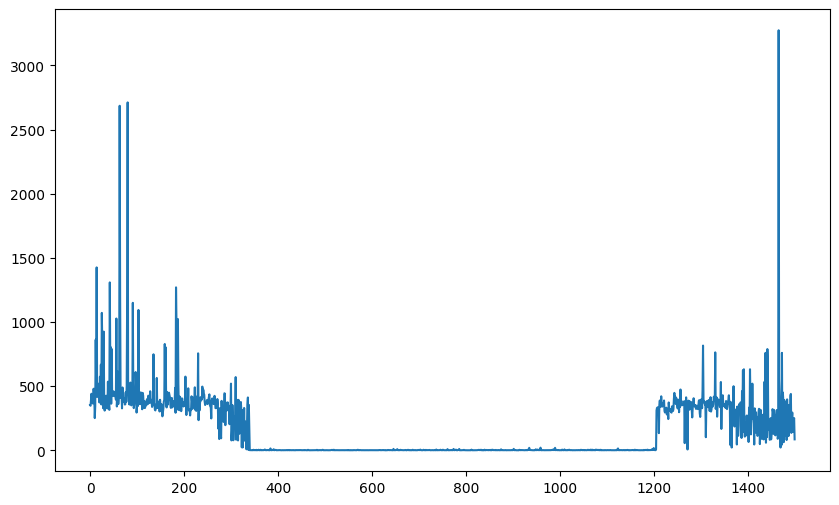

In [10]:
import matplotlib.pyplot as plt

# Plotting the actual and predicted traffic flow costs
plt.figure(figsize=(10, 6))
plt.plot(data.index, data['cost'], label='Actual Cost')
plt.plot(data.index, data['predicted_cost'], label='Predicted Cost')
plt.xlabel('Index')
plt.ylabel('Traffic Flow Cost')
plt.title('Actual vs Predicted Traffic Flow Costs')
plt.legend()
plt.grid(True)
plt.show()
